In [15]:
import requests
from IPython import display
from base64 import b64decode
import pandas as pd
import json

API_BASE="http://xdddev.chtc.io/askem_staging/"

# Table search and extraction

In [55]:
url = f"{API_BASE}object?askem_class=Table&contentText=parameter estimation"
resp = requests.get(url)
data = resp.json()
data

{'success': {'v': 1,
  'data': [{'ASKEM_CLASS': 'Table',
    'properties': {'caption': None,
     'documentID': 'dceee885-6dd7-4c79-a8be-59d0a6e636cc',
     'documentTitle': 'Modeling the epidemic dynamics and control of COVID-19 outbreak in China',
     'contentText': 'Table 1 Parameter estimation of the epidemic dynamics in Wuhan, Hubei (excluding Wuhan) and China (excluding Hubei) Wuhan Hubei (excluding Wuhan) China (excluding Hubei) stage I stage II stage III stage I stage II stage I stage II Quarantine rate 0.0630 0.3917 0.6185 0.05 0.4880 0.1941 0.5157 Reproductive number 4.7092 0.7575 0.4797 5.934 0.6079 1.5283 0.5753 Confirmation rate 0.05 0.0643 0.3220 0.05 0.1914 0.05 0.2189',
     'contentJSON': {'0': {'0': 'Table 1',
       '1': '',
       '2': '',
       '3': 'Quarantine rate',
       '4': 'Reproductive number',
       '5': 'Conﬁrmation rate'},
      '1': {'0': 'Parameter estimation of the epidemic dynamics in Wuhan, Hubei (excluding Wuhan) and China (excluding Hubei)',
  

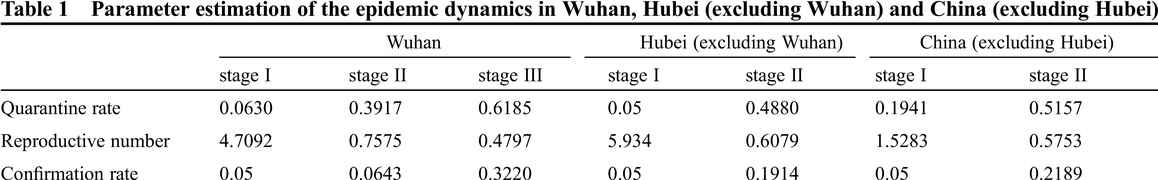

In [56]:
result = data["success"]["data"][0]
display.Image(b64decode(result['properties']['image']))

In [57]:
df = pd.read_json(json.dumps(result['properties']['contentJSON']))
df

,0,1,2,3,4,5,6,7
0,Table 1,Parameter estimation of the epidemic dynamics ...,,,,,,
1,,,Wuhan,,,Hubei (excluding Wuhan),,China (excluding Hubei)
2,,stage I,stage II,stage III,stage I,stage II,stage I,stage II
3,Quarantine rate,0.0630,0.3917,0.6185,0.05,0.4880,0.1941,0.5157
4,Reproductive number,4.7092,0.7575,0.4797,5.934,0.6079,1.5283,0.5753
5,Conﬁrmation rate,0.05,0.0643,0.3220,0.05,0.1914,0.05,0.2189


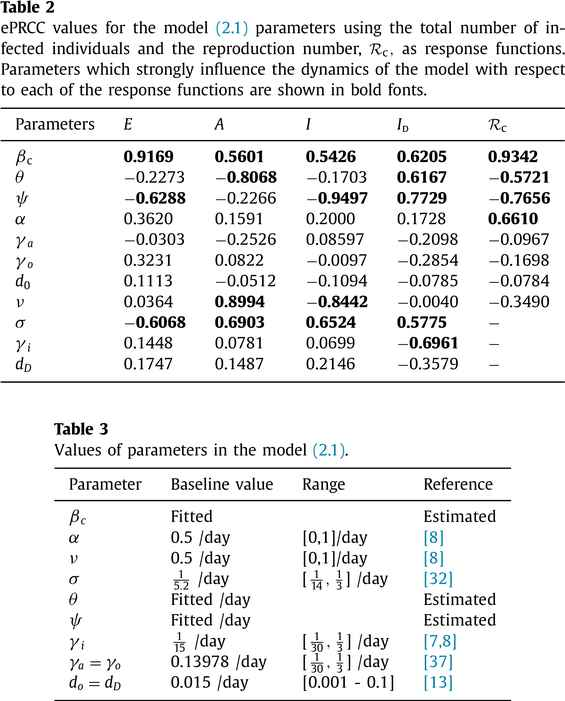

In [58]:
url = f"{API_BASE}/object/0842faf6-c659-4604-b553-55d8bfbe928d"
resp = requests.get(url)
data = resp.json()
result = data["success"]["data"][0]
display.Image(b64decode(result['properties']['image']))

In [59]:
df = pd.read_json(json.dumps(result['properties']['contentJSON']))
df

,0,1,2
0,Table 2,,
1,,ePRCC values for the model (2.1) parameters us...,
2,,fected individuals and the reproduction number...,
3,,Parameters which strongly inﬂuence the dynamic...,
4,to each of the response functions are shown in...,,
5,Parameters \nE \nA,I \nI d,R c
6,β c \n0.9169 \n0.5601,0.5426 \n0.6205,0.9342
7,θ\n−0.2273 \n−0.8068,−0.1703 \n0.6167,−0.5721
8,ψ \n−0.6288 \n−0.2266,−0.9497 \n0.7729,−0.7656
9,α\n0.3620 \n0.1591,0.2000 \n0.1728,0.6610


# Term lookup

# Parameter lookup